# 1. Introduction

## 1.1 Background

The business has noted a depressed sales in our mobile phone portfolio - though this can be attributed to adverse economic situation, internal studies established that competition especially open market ecosystem is rapidly gaining ground. Further, it identified changing consumer preferences as the main reason for this loss of appeal to our offering.
<strong> 
Conjoint study </strong>  was therefore a good fit as it was going enable us establish consumer preferences, understand trade-offs, and identify key drivers of choice
h.

## 1.2 The Objective

The objective of the conjoint analysis is 
1. To find the combination of attributes or features that the customer most values
2. and the price point for the optimal feature bundle.
3. To calculate the part-worth utility for the attributes.

### 1.3 The Data

Data for this study was generated through a process that is as described below

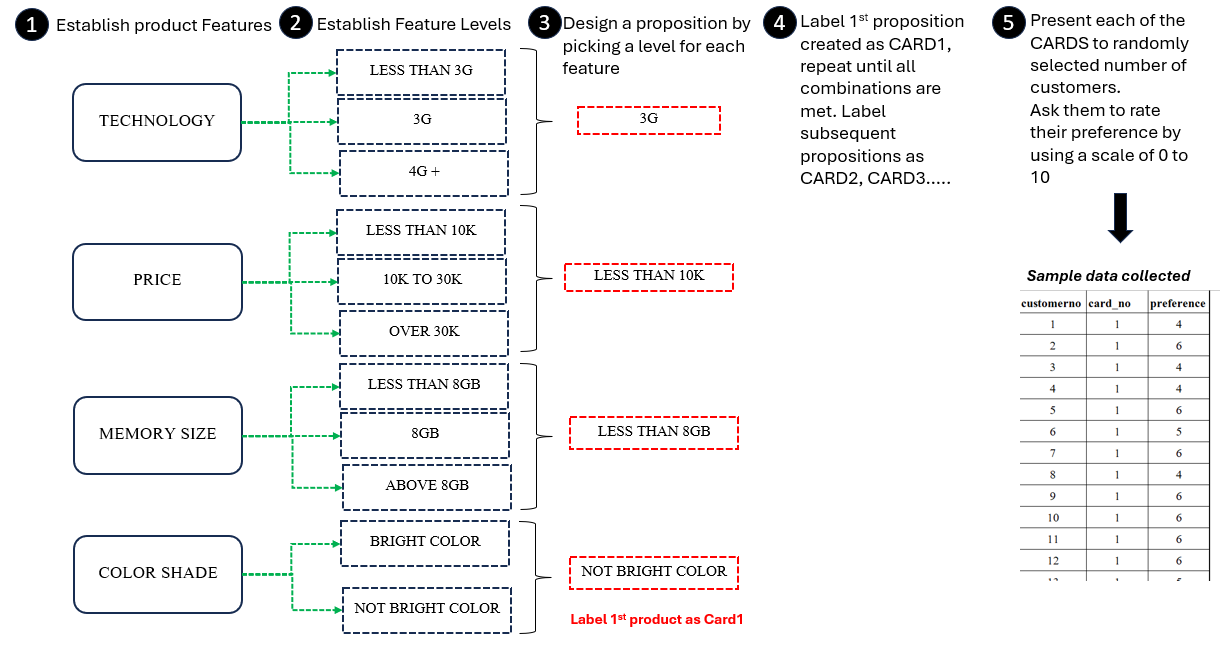

#

### 1.4 The Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2.0 Data

### 2.1 Import & Join DataFrames

***import data generated from experiment***

In [2]:
survey_data = pd.read_csv('survey_data.csv')

In [3]:
survey_data.head()

,customerno,card_no,Utility
0,1,1,4
1,1,2,7
2,1,3,7
3,1,4,5
4,1,5,6


In [4]:
# Establish data size
survey_data.shape

(9000, 3)

In [5]:
# Establish customers in the experiment
survey_data['customerno'].nunique() 

500

In [6]:
#Establish number of propositions created and in survey
survey_data['card_no'].nunique() 

18

In [7]:
# Check for any null values
survey_data.isna().sum()

customerno    0
card_no       0
Utility       0
dtype: int64

#
***Import Card/ Proposition Details***

In [8]:
proposition_details = pd.read_csv('card_details.csv')

In [9]:
proposition_details.head()

,card_no,card_detail,3g,3g_pus,3g_below,10k_less,10k_to_30k,30k_plus,8gb_below,8gb,8gb_plus,color_bright,color_not_bright
0,1,Specs => 3G Ram below 8GB NotBright Price belo...,1,0,0,1,0,0,1,0,0,0,1
1,2,Specs => 3G Below 8GB Ram NotBright Price 10k ...,1,0,0,0,1,0,0,1,0,0,1
2,3,Specs => 3G Above 8GB Ram Bright Price 30K+,1,0,0,0,0,1,0,0,1,1,0
3,4,Specs => 4G+ Ram below 8GB Bright Price 10k - 30k,0,1,0,0,1,0,1,0,0,1,0
4,5,Specs => 4G+ Below 8GB Ram NotBright Price 30K+,0,1,0,0,0,1,0,1,0,0,1


In [10]:
#Establish number of propositions created and in survey
proposition_details['card_no'].nunique() 

18

We note the following

1. Proposition file is already in the right format (Feature levels are part of the columns)
2. All cards were used in the experiment
3. Card_no appears in both DataFrames

We therefore join the 2 files

#
***Perform a merge procedure***

In [11]:
# Performing a left join to retain all records from survey_data
df = pd.merge(survey_data, proposition_details, on='card_no', how='left')

In [12]:
df.head()

,customerno,card_no,Utility,card_detail,3g,3g_pus,3g_below,10k_less,10k_to_30k,30k_plus,8gb_below,8gb,8gb_plus,color_bright,color_not_bright
0,1,1,4,Specs => 3G Ram below 8GB NotBright Price belo...,1,0,0,1,0,0,1,0,0,0,1
1,1,2,7,Specs => 3G Below 8GB Ram NotBright Price 10k ...,1,0,0,0,1,0,0,1,0,0,1
2,1,3,7,Specs => 3G Above 8GB Ram Bright Price 30K+,1,0,0,0,0,1,0,0,1,1,0
3,1,4,5,Specs => 4G+ Ram below 8GB Bright Price 10k - 30k,0,1,0,0,1,0,1,0,0,1,0
4,1,5,6,Specs => 4G+ Below 8GB Ram NotBright Price 30K+,0,1,0,0,0,1,0,1,0,0,1


In [13]:
# Observe columns
df.columns

Index(['customerno', 'card_no', 'Utility', 'card_detail', '3g', '3g_pus',
       '3g_below', '10k_less', '10k_to_30k', '30k_plus', '8gb_below', '8gb',
       '8gb_plus', 'color_bright', 'color_not_bright'],
      dtype='object')

In [14]:
#Re-arranging columns so that utility becomes the last column
df = df[['customerno', 'card_no', 'card_detail', '3g', '3g_pus',
       '3g_below', '10k_less', '10k_to_30k', '30k_plus', '8gb_below', '8gb',
       '8gb_plus', 'color_bright', 'color_not_bright', 'Utility']]

### 2.2 Understanding Data

In [15]:
df.shape

(9000, 15)

In [16]:
#Check whether there are any missing
df.isna().sum().T

customerno          0
card_no             0
card_detail         0
3g                  0
3g_pus              0
3g_below            0
10k_less            0
10k_to_30k          0
30k_plus            0
8gb_below           0
8gb                 0
8gb_plus            0
color_bright        0
color_not_bright    0
Utility             0
dtype: int64

In [17]:
#Identify any duplicate
df.duplicated().sum()

0

In [18]:
# check column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerno        9000 non-null   int64 
 1   card_no           9000 non-null   int64 
 2   card_detail       9000 non-null   object
 3   3g                9000 non-null   int64 
 4   3g_pus            9000 non-null   int64 
 5   3g_below          9000 non-null   int64 
 6   10k_less          9000 non-null   int64 
 7   10k_to_30k        9000 non-null   int64 
 8   30k_plus          9000 non-null   int64 
 9   8gb_below         9000 non-null   int64 
 10  8gb               9000 non-null   int64 
 11  8gb_plus          9000 non-null   int64 
 12  color_bright      9000 non-null   int64 
 13  color_not_bright  9000 non-null   int64 
 14  Utility           9000 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 1.0+ MB


In [19]:
df.dtypes

customerno           int64
card_no              int64
card_detail         object
3g                   int64
3g_pus               int64
3g_below             int64
10k_less             int64
10k_to_30k           int64
30k_plus             int64
8gb_below            int64
8gb                  int64
8gb_plus             int64
color_bright         int64
color_not_bright     int64
Utility              int64
dtype: object

In [20]:
#Check unique per columns
df.nunique()

customerno          500
card_no              18
card_detail          18
3g                    2
3g_pus                2
3g_below              2
10k_less              2
10k_to_30k            2
30k_plus              2
8gb_below             2
8gb                   2
8gb_plus              2
color_bright          2
color_not_bright      2
Utility              10
dtype: int64

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerno,9000.0,250.500000,144.345298,1.0,125.75,250.5,375.25,500.0
card_no,9000.0,9.500000,5.188416,1.0,5.00,9.5,14.00,18.0
3g,9000.0,0.333333,0.471431,0.0,0.00,0.0,1.00,1.0
3g_pus,9000.0,0.333333,0.471431,0.0,0.00,0.0,1.00,1.0
3g_below,9000.0,0.333333,0.471431,0.0,0.00,0.0,1.00,1.0
10k_less,9000.0,0.333333,0.471431,0.0,0.00,0.0,1.00,1.0
10k_to_30k,9000.0,0.333333,0.471431,0.0,0.00,0.0,1.00,1.0
30k_plus,9000.0,0.333333,0.471431,0.0,0.00,0.0,1.00,1.0
8gb_below,9000.0,0.333333,0.471431,0.0,0.00,0.0,1.00,1.0
8gb,9000.0,0.333333,0.471431,0.0,0.00,0.0,1.00,1.0


In [22]:
# Identify number of customers who responded for each card / proposition
for column in df.select_dtypes(include=['object', 'category']):
    print(df[column].value_counts())

card_detail
Specs => 3G Ram below 8GB NotBright Price below 10K          500
Specs => 3G Below 8GB Ram NotBright Price 10k - 30k          500
Specs => below 3G Below 8GB Ram NotBright Price 30K+         500
Specs => below 3G Ram below 8GB NotBright Price 10k - 30k    500
Specs => 4G+ Above 8GB Ram NotBright Price 30K+              500
Specs => 4G+ Below 8GB Ram Bright Price 10k - 30k            500
Specs => 4G+ Ram below 8GB NotBright Price below 10K         500
Specs => 3G Above 8GB Ram NotBright Price 10k - 30k          500
Specs => 3G Below 8GB Ram NotBright Price below 10K          500
Specs => 3G Ram below 8GB Bright Price 30K+                  500
Specs => below 3G Above 8GB Ram NotBright Price 10k - 30k    500
Specs => below 3G Below 8GB Ram Bright Price below 10K       500
Specs => below 3G Ram below 8GB NotBright Price 30K+         500
Specs => 4G+ Above 8GB Ram NotBright Price below 10K         500
Specs => 4G+ Below 8GB Ram NotBright Price 30K+              500
Specs => 4G+ 

In [23]:
d = df.groupby(['card_no','card_detail'])['Utility'].mean().reset_index()
d

,card_no,card_detail,Utility
0,1,Specs => 3G Ram below 8GB NotBright Price belo...,4.958
1,2,Specs => 3G Below 8GB Ram NotBright Price 10k ...,6.934
2,3,Specs => 3G Above 8GB Ram Bright Price 30K+,6.028
3,4,Specs => 4G+ Ram below 8GB Bright Price 10k - 30k,5.008
4,5,Specs => 4G+ Below 8GB Ram NotBright Price 30K+,6.944
5,6,Specs => 4G+ Above 8GB Ram NotBright Price bel...,8.996
6,7,Specs => below 3G Ram below 8GB NotBright Pric...,1.494
7,8,Specs => below 3G Below 8GB Ram Bright Price b...,3.018
8,9,Specs => below 3G Above 8GB Ram NotBright Pric...,5.984
9,10,Specs => 3G Ram below 8GB Bright Price 30K+,1.956


## 3.0 Exploratory Data Analysis

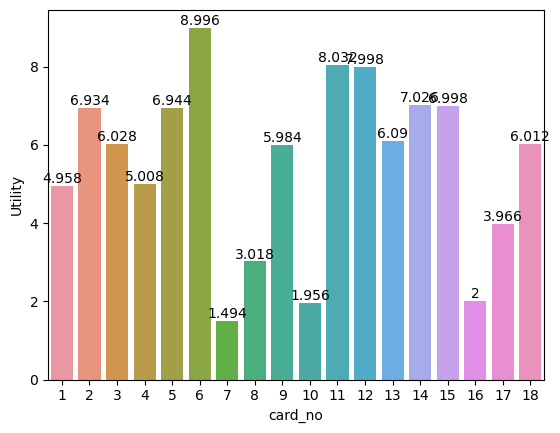

In [24]:
ax = sns.barplot(x = 'card_no',y = 'Utility',data = d)
for i in ax.containers:
    ax.bar_label(i,)

#plt.show()

<Axes: xlabel='Utility', ylabel='count'>

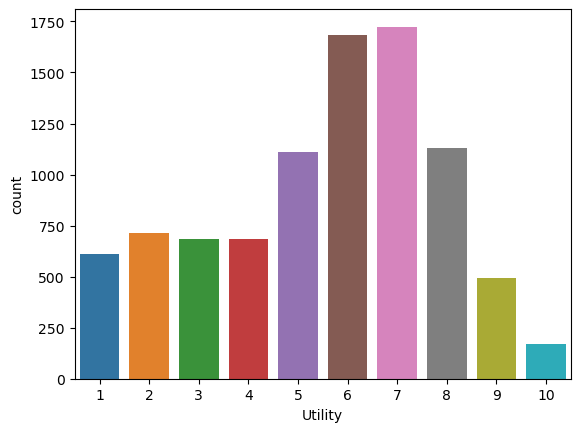

In [25]:
sns.countplot(x='Utility',data=df)

C:\Users\mmmutua\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Figure size 800x600 with 0 Axes>

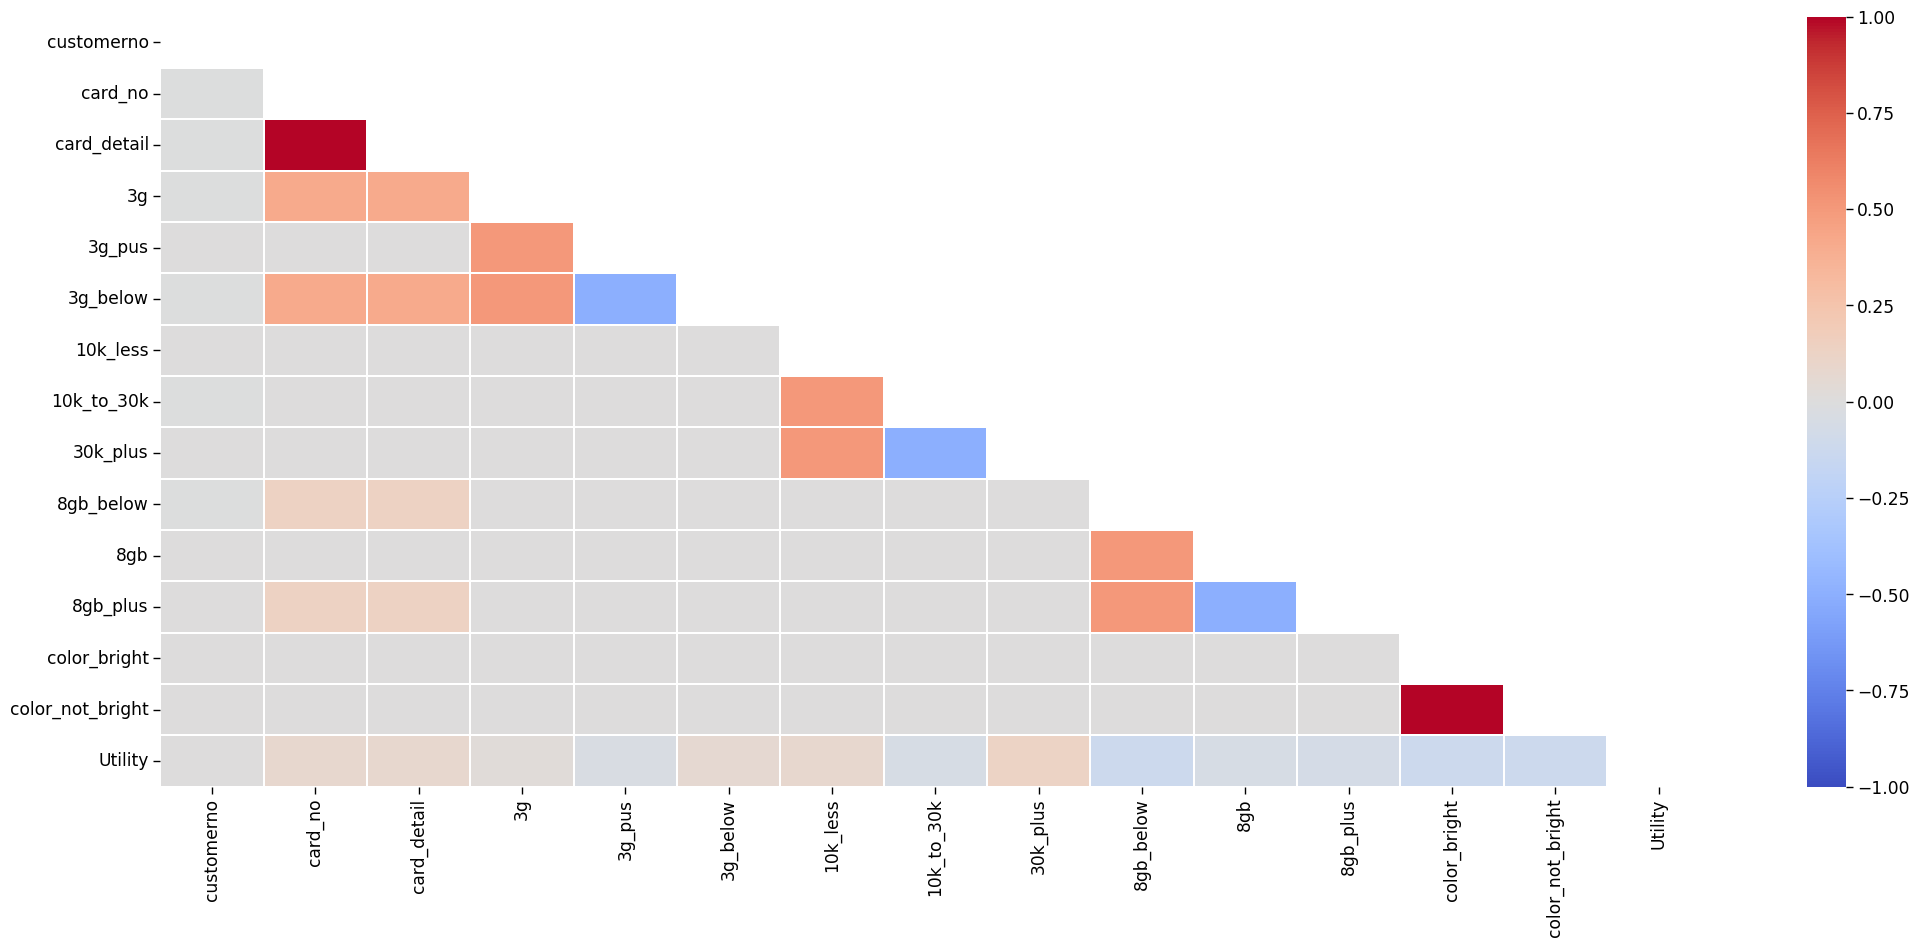

In [26]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()


#Correlation Matrix
plt.figure(figsize=(25, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, 
                 yticklabels=corr.columns, annot=True, 
                 linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

# 4. Train Data

In [27]:
 X = df[[
        '3g', '3g_pus', '3g_below',
        '10k_less', '10k_to_30k', '30k_plus', 
        '8gb_below', '8gb', '8gb_plus',
        'color_bright', 'color_not_bright']]

y = df.Utility

### 1. Compute part-worths from regression analysis

In [28]:
linearRegression = sm.OLS(y, X).fit()
linearRegression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Utility   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     6634.
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        14:44:37   Log-Likelihood:                -12126.
No. Observations:                9000   AIC:                         2.427e+04
Df Residuals:                    8992   BIC:                         2.432e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
3g                   1.6495      0.014    117.197      0.000       1.622       1.677
3g_pus               2.5088      0.014    178.252      0.000       2.481       2.536
3g_below            -0.5892      0.014    -41.860      0.000      -0.617      -0.562
10k_less             1.8495      0.014    131.407      0.000       1.822       1.877
10k_to_30k           1.4902      0.014    105.876      0.000       1.463       1.518
30k_plus             0.2295      0.014     16.306      0.000       0.202       0.257
8gb_below           -0.7505      0.014    -53.323      0.000      -0.778      -0.723
8gb                  1.6518      0.014    117.363      0.000       1.624       1.679
8gb_plus             2.6678      0.014    189.549      0.000       2.640       2.695
color_bright         1.2722      0.012    105.810      0.000       1.249       1.296
color_not_bright     2.2970      0.010    233.986      0.000       2.278       2.316
==============================================================================
Omnibus:                      755.473   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.325
Skew:                          -0.121   Prob(JB):                     1.33e-56
Kurtosis:                       2.208   Cond. No.                     2.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Part worth utility for each of the attribute levels are just the regression coefficients obtained from regression model

In [29]:
coeff =linearRegression.params.to_dict()
attrarray = {
'technology' : ['3g', '3g_pus', '3g_below'],
'Price' : ['10k_less','10k_to_30k', '30k_plus'],
'ram' : ['8gb_below', '8gb', '8gb_plus'],
'colorshade' : ['color_bright', 'color_not_bright']
}


part_worth_utility ={}
for attribute in attrarray.keys():
    print('\nAttribute:', attribute)
    temp_list = attrarray[attribute]
    for k in temp_list:
        part_worth_utility[k] =  coeff[k]
        print('       ',k, format(part_worth_utility[k], '.2f'))


Attribute: technology
        3g 1.65
        3g_pus 2.51
        3g_below -0.59

Attribute: Price
        10k_less 1.85
        10k_to_30k 1.49
        30k_plus 0.23

Attribute: ram
        8gb_below -0.75
        8gb 1.65
        8gb_plus 2.67

Attribute: colorshade
        color_bright 1.27
        color_not_bright 2.30


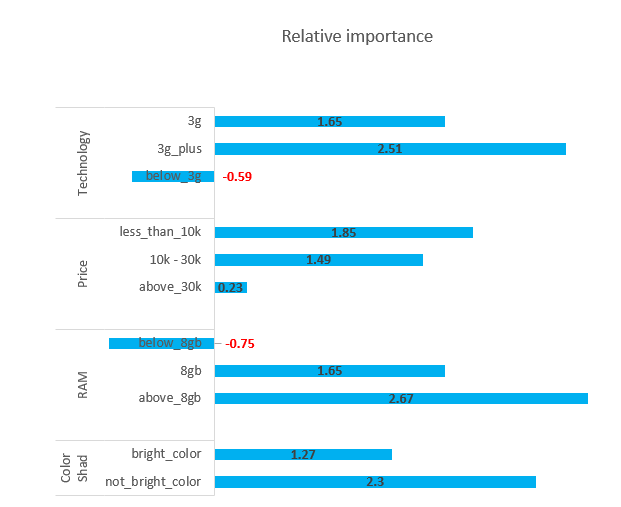

### Optimal Product Proposition

From above summary we got for part-worthy utility results, it is possible to arrive at the optimal feature bundle and optimal price point.

From the part-worth utility values, we can say3g_plusarRam of 8gb_plus0Kcolor_not_brightte> is the optimal feature bundl
e
From the part-worth range, we can say th0.23.22 is the importance for (maximum of pri30K_plus70
85
1.22 to be the importance value associated 1iK and belowhtility

Total predicted utility from the regression model for the feature com<3g_plus, Ram of 8gb_plus, color_not_bright>idewhi48 i.e. 2.51+2.67+2.30> is 7.71

#

In [30]:
partworth_range = {}
for attribute in attrarray.keys():
    temp_list = attrarray[attribute]
    tempRange = []
    for k in temp_list:
        if k in coeff.keys():
            tempRange.append(coeff[k])
    partworth_range[attribute] = tempRange
    
print ("####"*30)
print("\nPartworth range", partworth_range)

########################################################################################################################

Partworth range {'technology': [1.6495000000000057, 2.508833333333342, -0.5891666666666627], 'Price': [1.849500000000003, 1.490166666666654, 0.22950000000000637], 'ram': [-0.7504999999999956, 1.6518333333333368, 2.667833333333337], 'colorshade': [1.2721666666666627, 2.2969999999999953]}


### calculate relative importance

In [31]:
importance = {}
relative_importance = {}
for key, v in  partworth_range.items():
    importance[key] = ( max(v) - min(v))
total_of_imp_values = sum(importance.values())
for key,val in importance.items():
    relative_importance[key] = (100* round(val/total_of_imp_values,3))


print ("###"*10)
print ("Importance of Feature:\ntechnology:",format(importance['technology'],'.2f'),\
"\nPrice:", format(importance['Price'], '.2f'),  "\nRam:", format(importance['ram'],'.2f'), \
      "\nColor shade:", format(importance['colorshade'],'.2f'))

print ("###"*10)
print ("\nRelative Importance of Feature:\ntechnology:",format(relative_importance['technology'], '.2f'), "%",\
"\nPrice:",format(relative_importance['Price'], '.2f') , "%", \
       "\nRam:", format(relative_importance['ram'], '.2f'), "%",\
       "\nColor:", format(relative_importance['colorshade'], '.2f') , "%\n")
print ("###"*10)

##############################
Importance of Feature:
technology: 3.10 
Price: 1.62 
Ram: 3.42 
Color shade: 1.02
##############################

Relative Importance of Feature:
technology: 33.80 % 
Price: 17.70 % 
Ram: 37.30 % 
Color: 11.20 %

##############################


Text(0.5, 1.0, 'Est. Importance of Main Features')

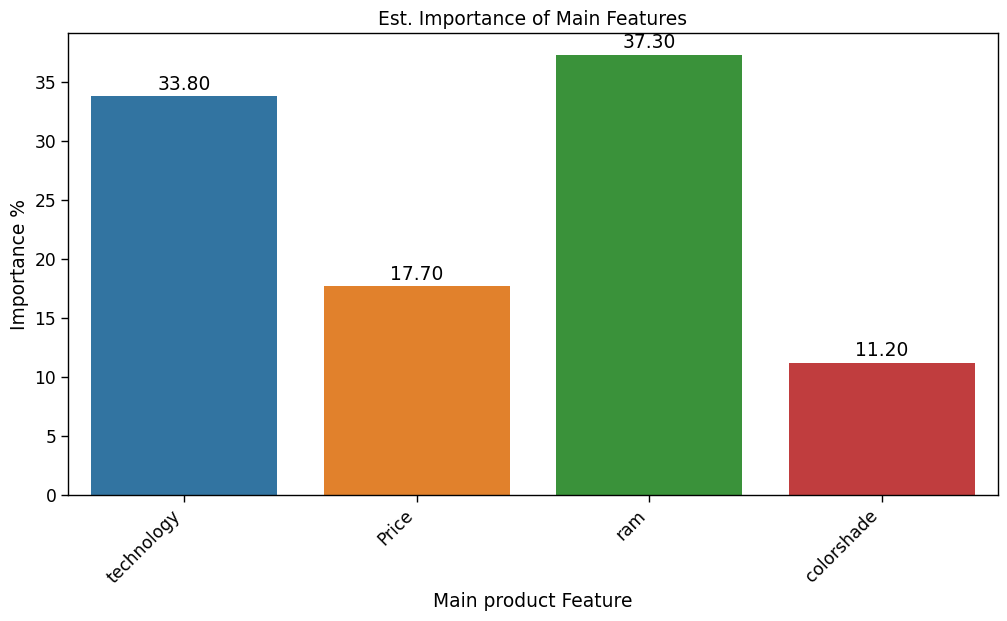

In [32]:
df_relative_importance = pd.DataFrame(list(relative_importance.items()), columns=['Feature', 'Importance'])

plt.figure(figsize=(12, 6))  # Set the figure size
sns.set_context('paper', font_scale=1.4)

# Create the bar plot
ax = sns.barplot(x='Feature', y='Importance', data=df_relative_importance)

# Add the values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Rotate the x labels if necessary for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Main product Feature')
plt.ylabel('Importance %')
plt.title('Est. Importance of Main Features')

In [33]:
partworth_range = {}
for attribute in attrarray.keys():
    temp_list = attrarray[attribute]
    tempRange = []
    for k in temp_list:
        if k in coeff.keys():
            tempRange.append(coeff[k])
    partworth_range[attribute] = tempRange
print ("--"*10)
print("\nPartworth range",partworth_range )
importance = {}
relative_importance = {}
for key, v in  partworth_range.items():
    importance[key] = ( max(v) - min(v))
total_of_imp_values = sum(importance.values())
for key,val in importance.items():
    relative_importance[key] = (100* round(val/total_of_imp_values,3))
    

print ("--"*10)
print ("Importance of Feature:\ntechnology:",format(importance['technology'],'.2f'),\
"\nPrice:", format(importance['Price'], '.2f'),  "\nRam:", format(importance['ram'],'.2f'), \
      "\nColor Shade:", format(importance['colorshade'],'.2f'))

print ("--"*10)
print ("\nRelative Importance of Feature:\ntechnology:",format(relative_importance['technology'], '.2f'), "%",\
"\nPrice:",format(relative_importance['Price'], '.2f') , "%", \
       "\nRam:", format(relative_importance['ram'], '.2f'), "%",\
       "\nColor Shade:", format(relative_importance['colorshade'], '.2f') , "%\n")
print ("--"*10)

--------------------

Partworth range {'technology': [1.6495000000000057, 2.508833333333342, -0.5891666666666627], 'Price': [1.849500000000003, 1.490166666666654, 0.22950000000000637], 'ram': [-0.7504999999999956, 1.6518333333333368, 2.667833333333337], 'colorshade': [1.2721666666666627, 2.2969999999999953]}
--------------------
Importance of Feature:
technology: 3.10 
Price: 1.62 
Ram: 3.42 
Color Shade: 1.02
--------------------

Relative Importance of Feature:
technology: 33.80 % 
Price: 17.70 % 
Ram: 37.30 % 
Color Shade: 11.20 %

--------------------


### Prediction

        '3g', 
        '3g_pus', 
        '3g_below', 
        '10k_less',
        '10k_to_30k', 
        '30k_plus', 
        '8gb_below', 
        '8gb', 
        '8gb_plus',
        'color_bright', 
        'color_not_bright'

***Assume as follows you developed a proposition***
 - 3G Technology
 - 8GB Ram
 - color = Not bright
 - costing 10k - 30k

That product is represented as  [1,0,0,0,1,0,0,1,0,0,1]

In [34]:
NewProposition = [1,0,0,    # 3G Tech
                  0,1,0,    # 10k - 30k
                  0,1,0,    # 8GB Ram
                  0,1]      # color not bright
#print ("The optimal feature bundle   would have the highest utility:",\
#linearRegression.predict(NewProposition)[0])
print(f'Estimated share is {100*linearRegression.predict(NewProposition)[0]/7.48}')

#print(f'With share of {linearRegression.predict(NewProposition)[0])/7.48}%')

Estimated share is 94.76604278074855


### 3. Market share simulation

To calculate the market share for a feature-bundle, we need to calculate the preference share or the probability that the customer will choose that particular feature-bundle. There are many ways to calculate this preference share. The reference[2] gives three methods of arriving at the preference share. One is the logit-choice rule which assumes the computed utilities follow a random process. According to this rule, the proportion of times that feature-bundle “j” will be chosen is given by:

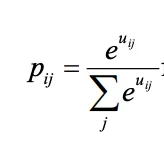

In [35]:
phoneDf = df.copy()


X = df[['3g', 
        '3g_pus', 
        '3g_below', 
        '10k_less',
        '10k_to_30k', 
        '30k_plus', 
        '8gb_below', 
        '8gb', 
        '8gb_plus',
        'color_bright', 
        'color_not_bright']]

y = df.Utility
linearRegression = sm.OLS(y, X).fit()
linearRegression.summary()

ignorepricecols = ['10k_less','10k_to_30k', '30k_plus', ]
for col in ignorepricecols:
    phoneDf[col] = 0
phoneDf = phoneDf.drop(["Utility"],axis=1)
X = phoneDf[['3g', 
        '3g_pus', 
        '3g_below', 
        '10k_less',
        '10k_to_30k', 
        '30k_plus', 
        '8gb_below', 
        '8gb', 
        '8gb_plus',
        'color_bright', 
        'color_not_bright']]

predictUtil = linearRegression.predict(X)
phoneDf["predictedUtility"] = predictUtil
utility_values = list(phoneDf["predictedUtility"].values)
total_utility=0
for val in utility_values:
    total_utility = total_utility + np.exp(val)
market_shares =[]
for val in utility_values:
    probability = np.exp(val)/total_utility
    market_shares.append(probability*100)
phoneDf["market_share"]  = market_shares
phoneDf[['card_no',
        '3g', 
        '3g_pus', 
        '3g_below', 
        '8gb_below', 
        '8gb', 
        '8gb_plus',
        'color_bright', 
        'color_not_bright',
        'predictedUtility',
         'market_share']].drop_duplicates()


,card_no,3g,3g_pus,3g_below,8gb_below,8gb,8gb_plus,color_bright,color_not_bright,predictedUtility,market_share
0,1,1,0,0,1,0,0,0,1,3.196000,0.000787
1,2,1,0,0,0,1,0,0,1,5.598333,0.008701
2,3,1,0,0,0,0,1,1,0,5.589500,0.008624
3,4,0,1,0,1,0,0,1,0,3.030500,0.000667
4,5,0,1,0,0,1,0,0,1,6.457667,0.020548
5,6,0,1,0,0,0,1,0,1,7.473667,0.056756
6,7,0,0,1,1,0,0,0,1,0.957333,0.000084
7,8,0,0,1,0,1,0,1,0,2.334833,0.000333
8,9,0,0,1,0,0,1,0,1,4.375667,0.002562
9,10,1,0,0,1,0,0,1,0,2.171167,0.000283


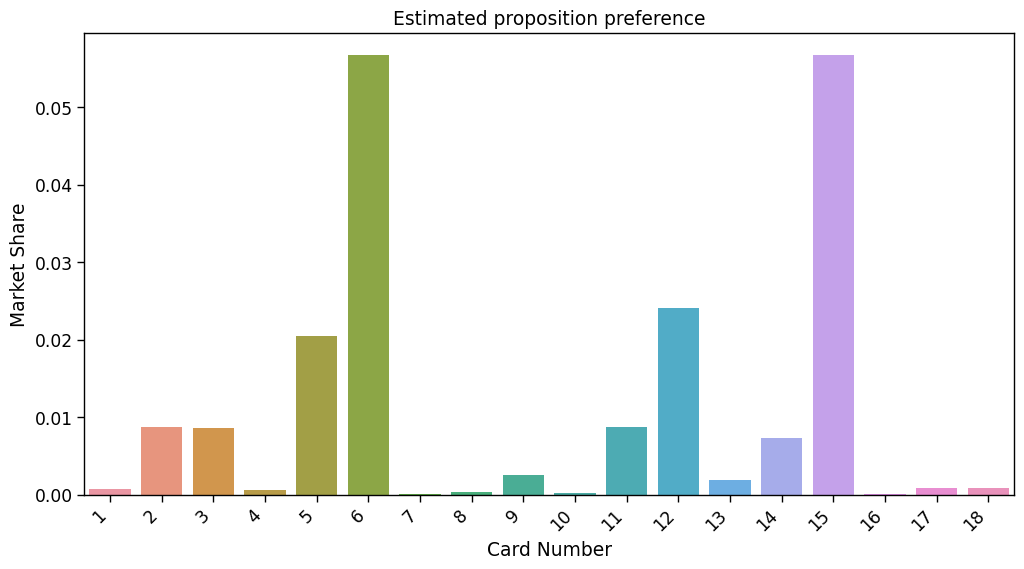

In [36]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.set_context('paper', font_scale=1.4)

# Create the bar plot
ax = sns.barplot(x='card_no', y='market_share', data=phoneDf)

# Rotate the x labels if necessary for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Card Number')
plt.ylabel('Market Share')
plt.title('Estimated proposition preference')

# Display the plot
plt.show()